In [5]:
!pip install pandas matplotlib seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [6]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

df.head()


Saving International Airlines Traffic.csv to International Airlines Traffic (3).csv


,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [7]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   199 non-null    object 
 1   AustralianPort          199 non-null    object 
 2   ForeignPort             199 non-null    object 
 3   Country                 199 non-null    object 
 4   Passengers_In           199 non-null    int64  
 5   Freight_In_(tonnes)     199 non-null    float64
 6   Mail_In_(tonnes)        199 non-null    float64
 7   Passengers_Out          199 non-null    int64  
 8   Freight_Out_(tonnes)    199 non-null    float64
 9   Mail_Out_(tonnes)       199 non-null    float64
 10  Passengers_Total        199 non-null    int64  
 11  Freight_Total_(tonnes)  199 non-null    float64
 12  Mail_Total_(tonnes)     199 non-null    float64
 13  Year                    199 non-null    int64  
 14  Month_num               199 non-null    in

,0
Month,0
AustralianPort,0
ForeignPort,0
Country,0
Passengers_In,0
Freight_In_(tonnes),0
Mail_In_(tonnes),0
Passengers_Out,0
Freight_Out_(tonnes),0
Mail_Out_(tonnes),0


In [8]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()


,month,australianport,foreignport,country,passengers_in,freight_in_(tonnes),mail_in_(tonnes),passengers_out,freight_out_(tonnes),mail_out_(tonnes),passengers_total,freight_total_(tonnes),mail_total_(tonnes),year,month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [12]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_num'].astype(str) + '-01')

/tmp/ipython-input-2154271421.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='month_num', y='passengers_total', ci=None)


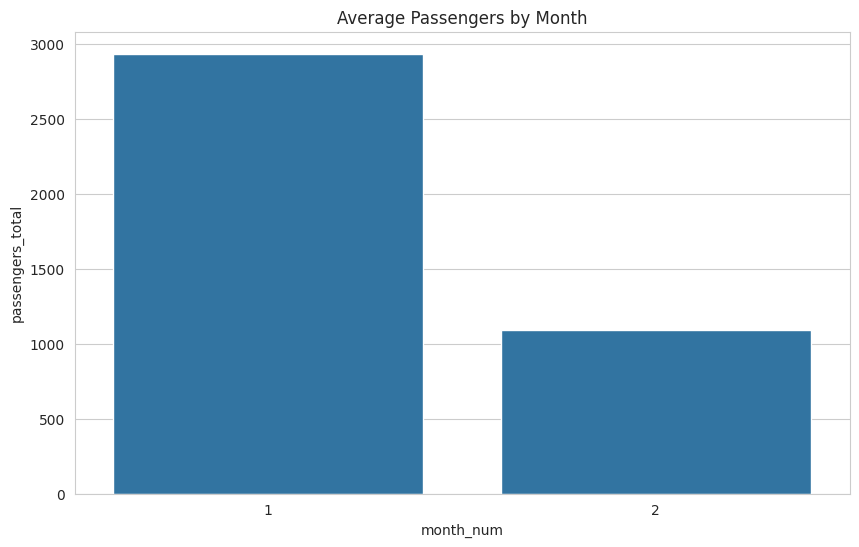

In [14]:
sns.barplot(data=df, x='month_num', y='passengers_total', ci=None)
plt.title("Average Passengers by Month")
plt.show()

/tmp/ipython-input-3780411950.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['country'].isin(top_countries)],


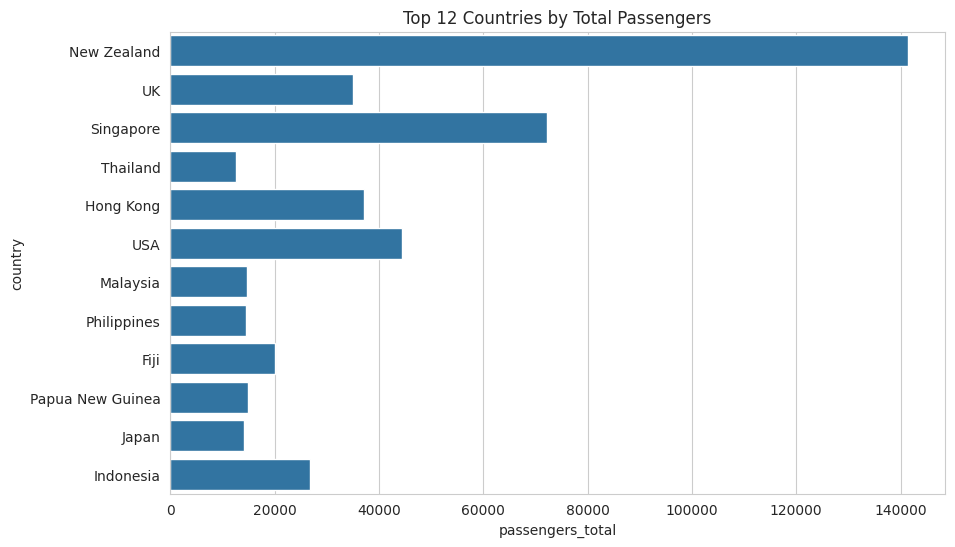

In [16]:
top_countries = df.groupby('country')['passengers_total'].sum().nlargest(12).index
sns.barplot(data=df[df['country'].isin(top_countries)],
            x='passengers_total', y='country', estimator=sum, ci=None)
plt.title("Top 12 Countries by Total Passengers")
plt.show()

/tmp/ipython-input-617962546.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['australianport'].isin(top_ports)],


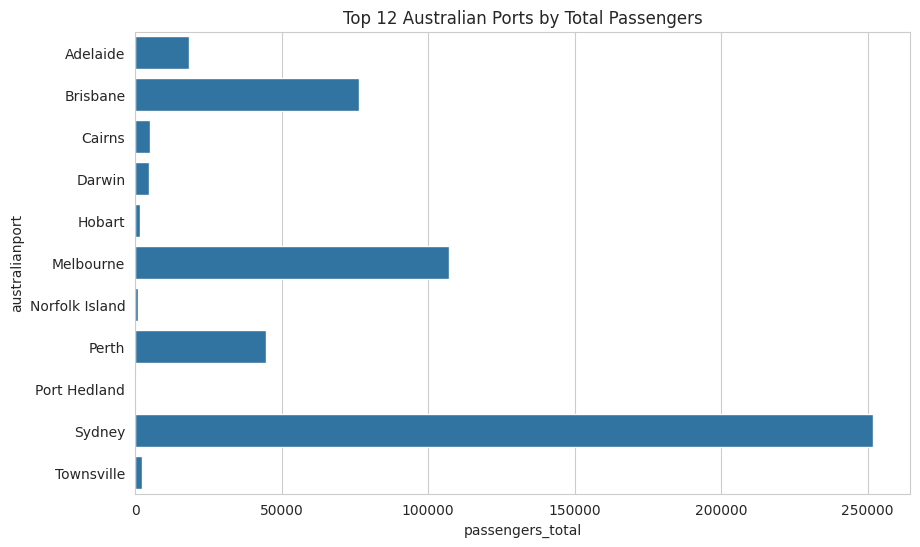

In [18]:
top_ports = df.groupby('australianport')['passengers_total'].sum().nlargest(12).index
sns.barplot(data=df[df['australianport'].isin(top_ports)],
            x='passengers_total', y='australianport', estimator=sum, ci=None)
plt.title("Top 12 Australian Ports by Total Passengers")
plt.show()

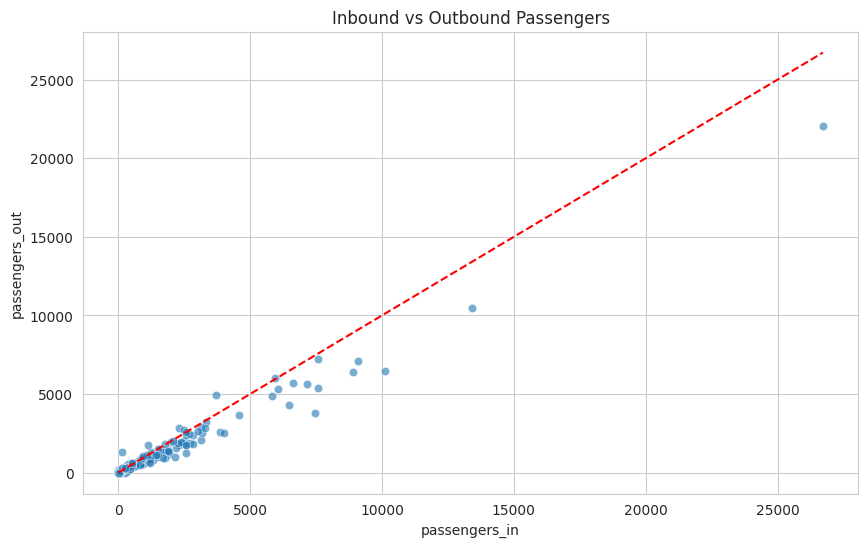

In [20]:
sns.scatterplot(data=df, x='passengers_in', y='passengers_out', alpha=0.6)
plt.plot([0, df[['passengers_in','passengers_out']].max().max()],
         [0, df[['passengers_in','passengers_out']].max().max()],
         'r--')
plt.title("Inbound vs Outbound Passengers")
plt.show()

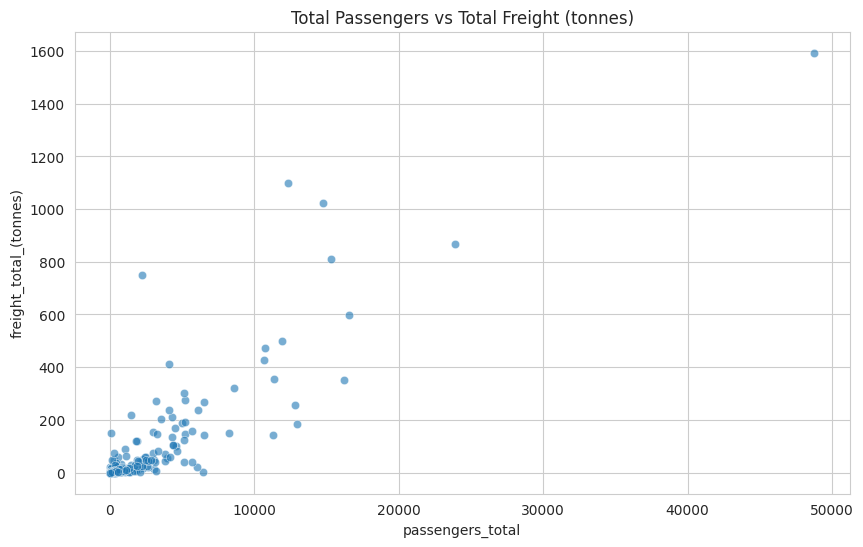

In [22]:
sns.scatterplot(data=df, x='passengers_total', y='freight_total_(tonnes)', alpha=0.6)
plt.title("Total Passengers vs Total Freight (tonnes)")
plt.show()

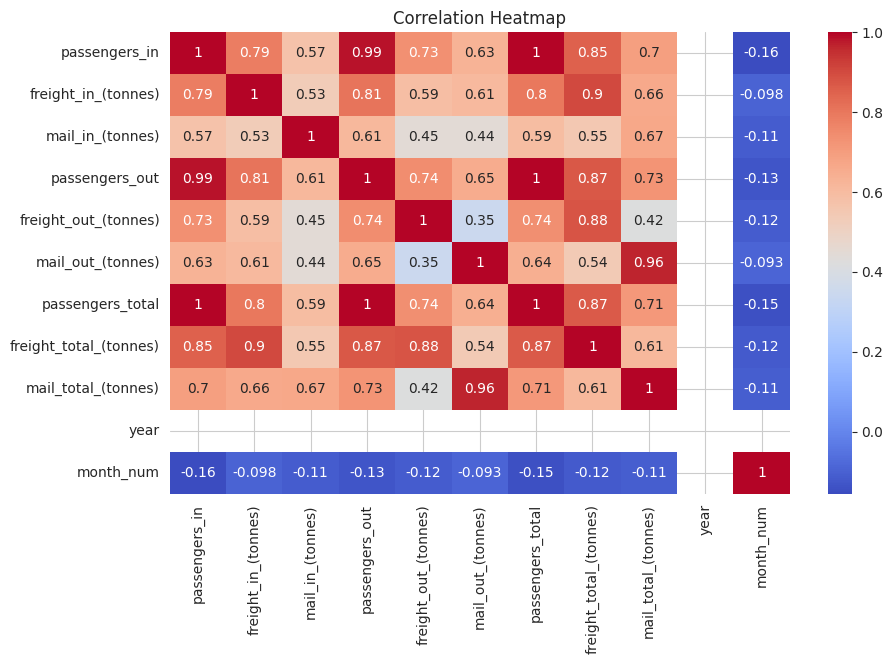

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


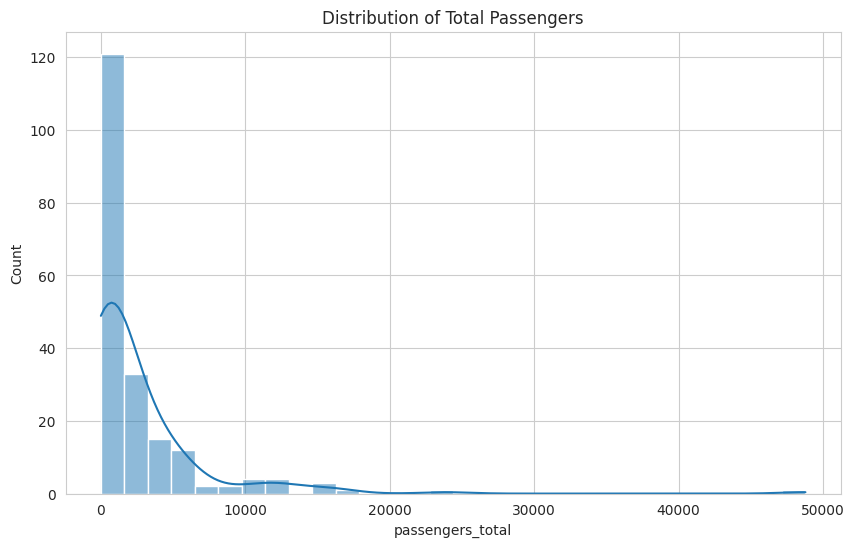

In [25]:
sns.histplot(df['passengers_total'], bins=30, kde=True)
plt.title("Distribution of Total Passengers")
plt.show()

In [26]:
plt.savefig("figure_name.png", dpi=300)


<Figure size 1000x600 with 0 Axes>